In [4]:
# importamos las librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fb = pd.read_csv("https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv",
                 index_col='date',parse_dates=True)

In [7]:
covid = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [8]:
quakes = pd.read_csv("https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/earthquakes.csv")

In [9]:
fb.shape

(251, 5)

In [14]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [15]:
fb.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,171.454424,173.615298,169.303110,171.510936,2.768798e+07
std,19.683435,19.423837,20.074382,19.977448,1.922117e+07
min,123.100000,129.740000,123.020000,124.060000,9.588587e+06
25%,157.815000,160.745000,155.525000,157.915000,1.782839e+07
50%,174.890000,176.980000,172.830000,174.700000,2.186093e+07
75%,184.890000,186.450000,183.420000,185.270000,3.031384e+07
max,215.715000,218.620000,214.270000,217.500000,1.698037e+08


In [10]:
covid.shape

(42304, 12)

In [13]:
quakes.shape

(9332, 6)

## Representación de la evolución

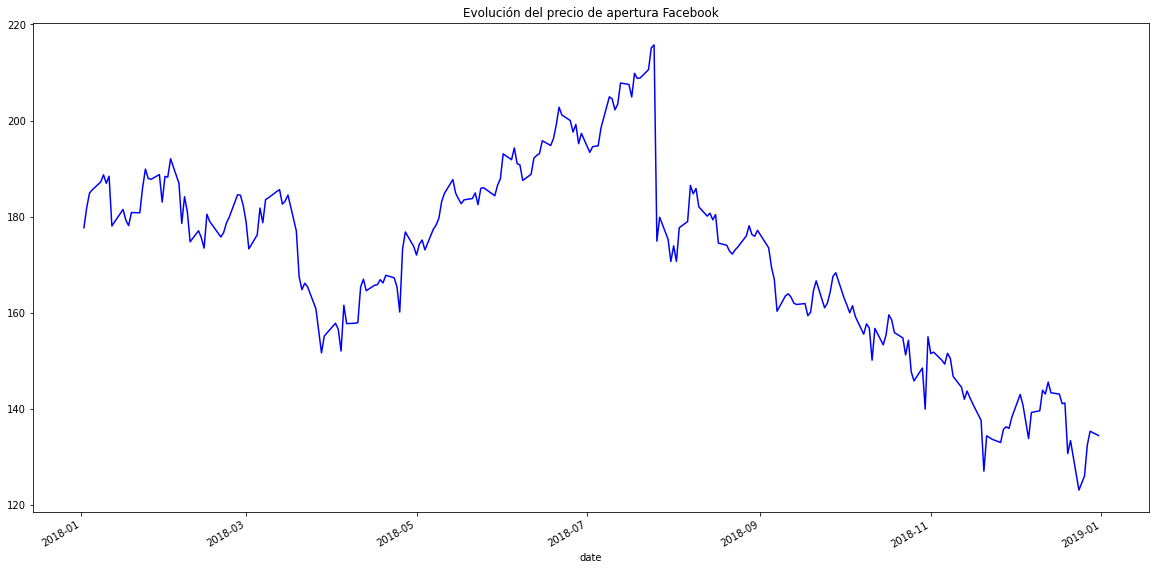

In [16]:
fb.plot(
    kind='line',
    y='open',
    figsize=(20,10),
    style='-b',
    legend=False,
    title='Evolución del precio de apertura Facebook'
)

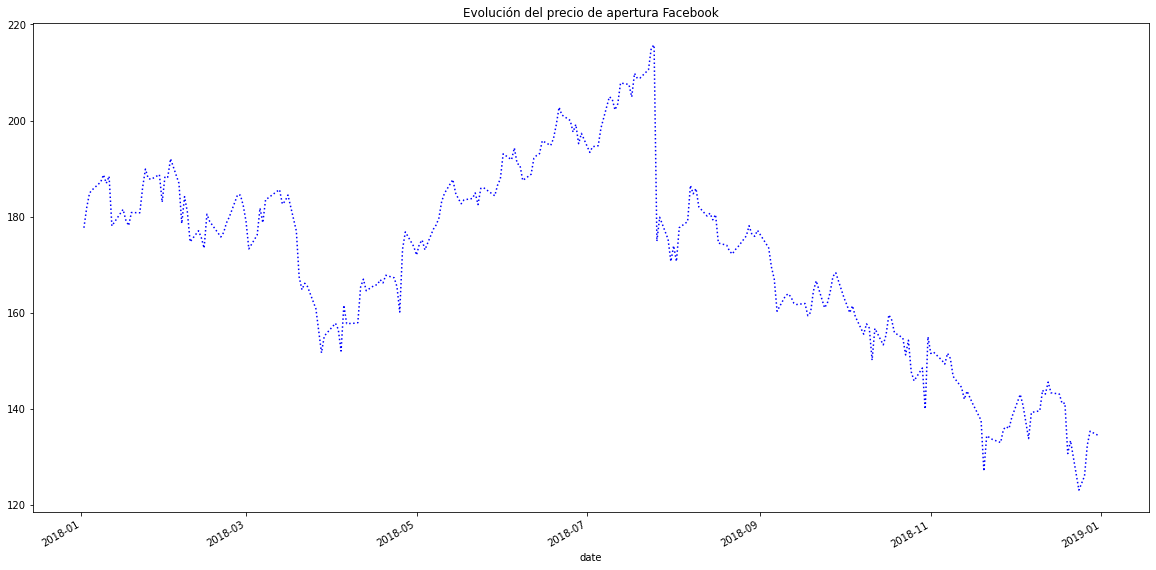

In [18]:
fb.plot(
    kind='line',
    y='open',
    figsize=(20,10),
    color='blue',
    linestyle='dotted',
    legend=False,
    title='Evolución del precio de apertura Facebook'
)

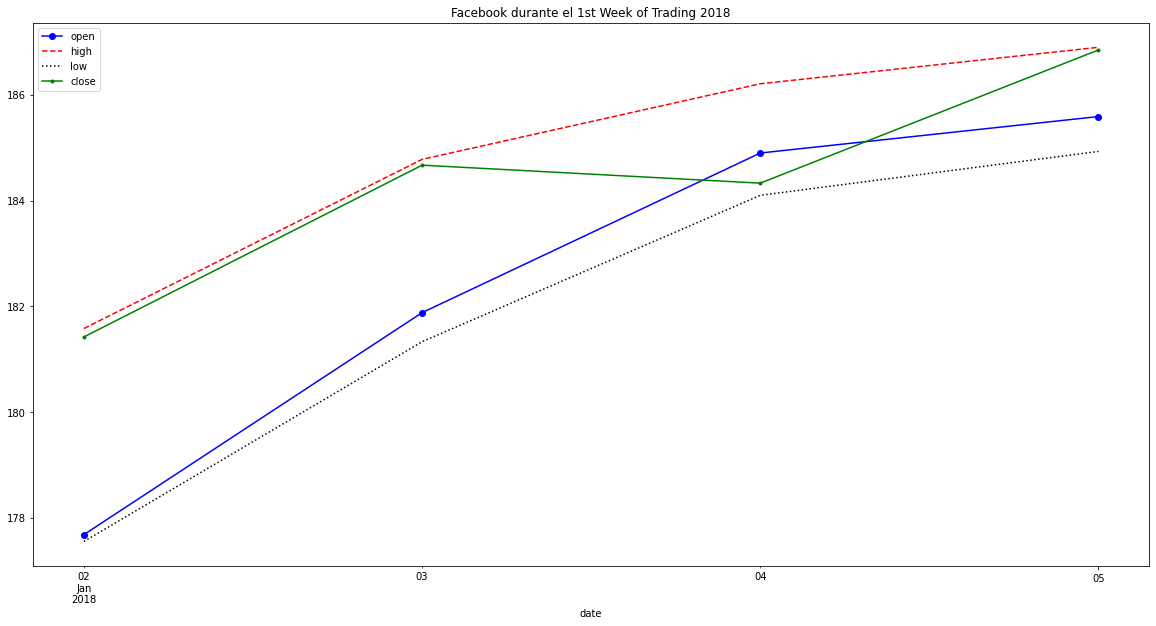

In [20]:
fb.first('1W').plot(
    y=['open','high','low','close'],
    style=['o-b','--r',':k','.-g'],
    title="Facebook durante el 1st Week of Trading 2018",
    figsize=(20,10),
).autoscale()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f437722d810>,
      dtype=object)

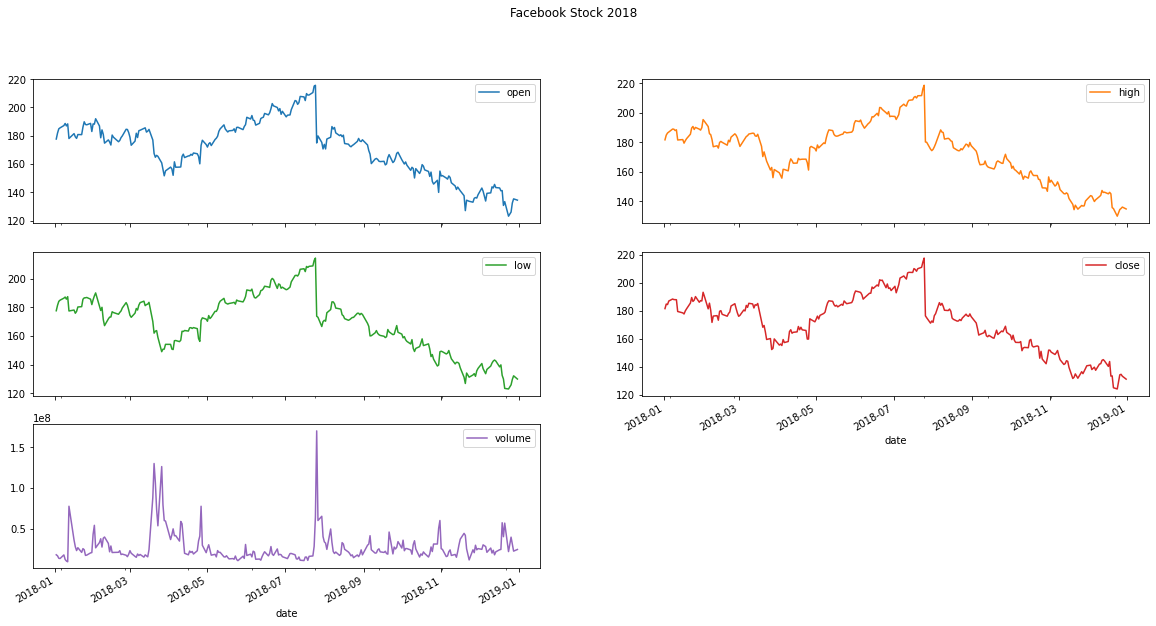

In [22]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(20,10),
    title='Facebook Stock 2018'
)

In [29]:
covid.countriesAndTerritories.nunique()

210

In [23]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

In [24]:
new_cases_rolling_average

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,...,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,USA,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.428571,156.857143,270.000000,18.428571,57.142857,0.0,0.0,10667.857143,154.142857,85.285714,53.142857,591.571429,142.571429,54.571429,687.857143,1766.142857,0.285714,187.714286,880.000000,31.285714,7.714286,0.285714,2.142857,860.285714,1.142857,331.428571,35.714286,27562.000000,0.428571,0.0,124.000000,36.428571,1.428571,0.142857,80.428571,680.571429,69.000000,NaN,0.428571,2.857143,...,7.857143,54.857143,5.428571,131.142857,75.428571,3.857143,1610.857143,141.285714,4.857143,9740.142857,15.857143,9.0,33.714286,228.285714,396.428571,52.714286,0.714286,36.714286,4.285714,0.0,12.000000,113.142857,265.571429,1622.285714,6.857143,34794.000000,161.714286,2634.428571,786.428571,3050.285714,0.0,5.571429,18.428571,549.285714,1035.857143,2.000000,0.0,3.714286,109.000000,78.428571
2020-09-15,45.857143,159.142857,263.285714,25.285714,60.428571,0.0,0.0,10963.571429,160.571429,82.571429,52.857143,597.000000,140.714286,60.428571,604.428571,1710.42857

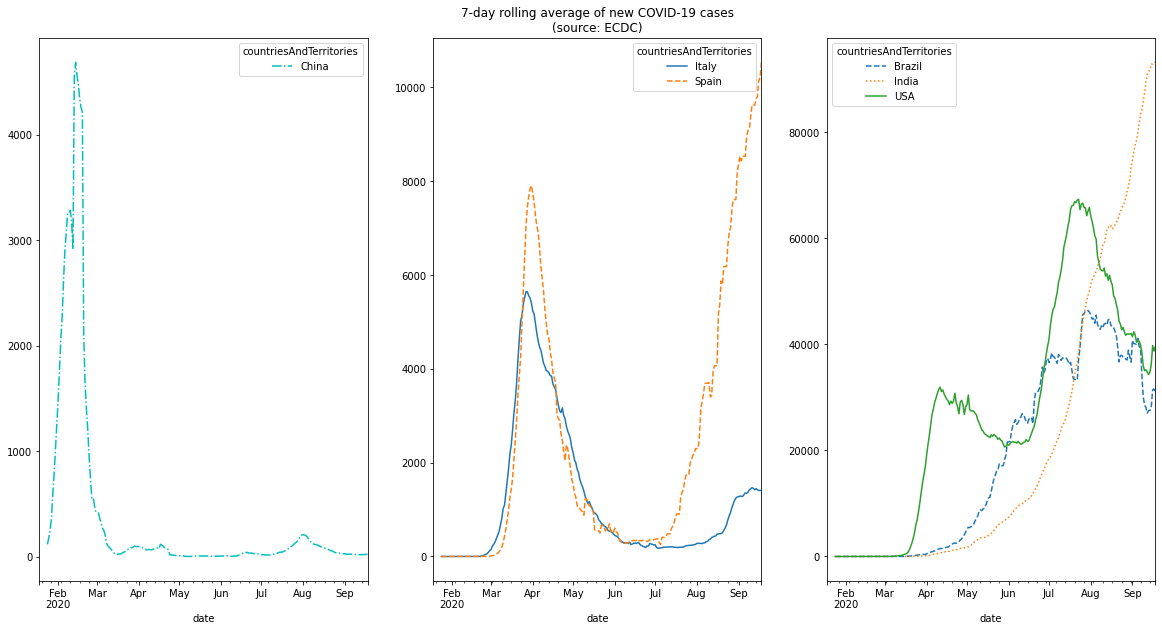

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

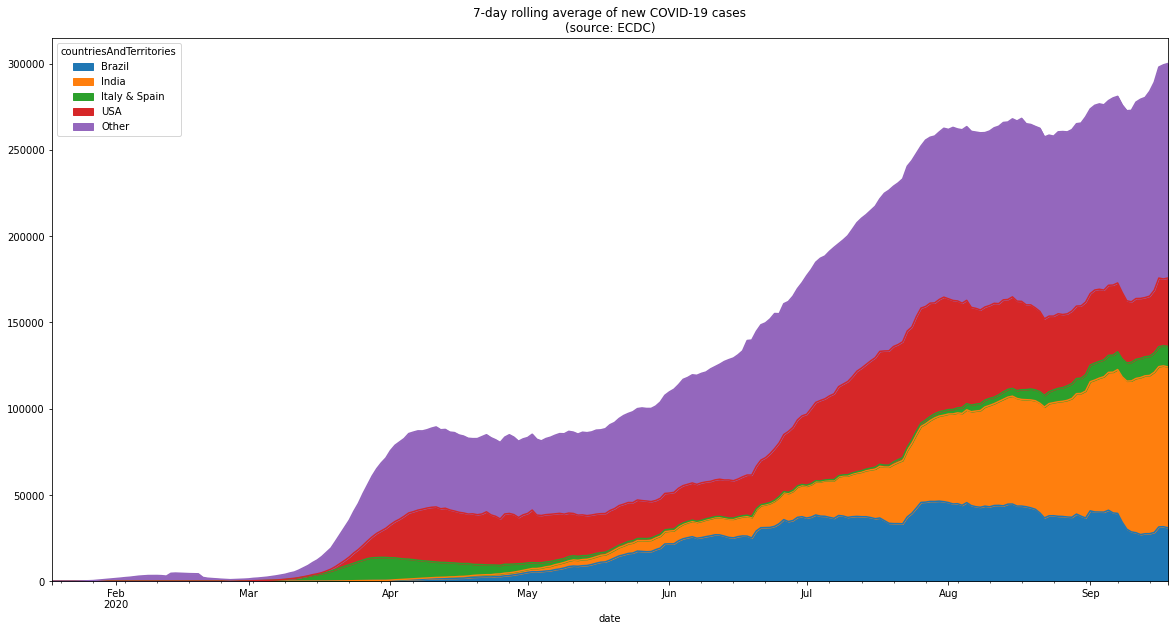

In [27]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(20, 10), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

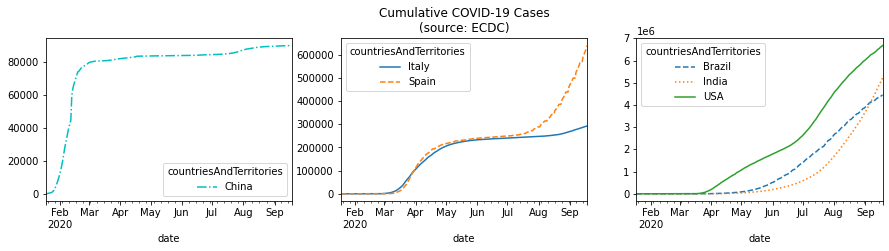

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

## Visualización de correlación con mapa de calor

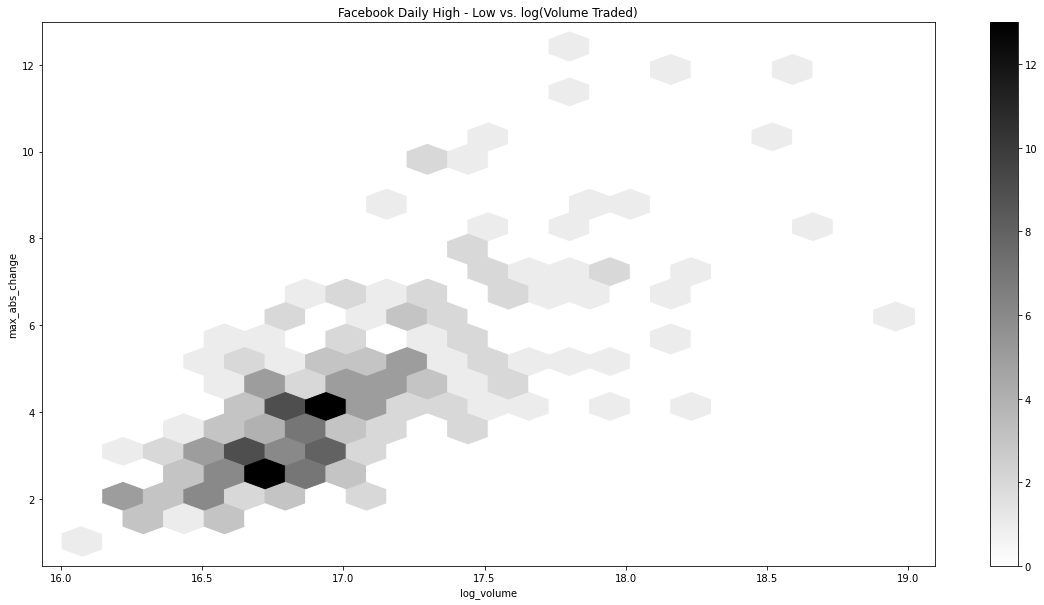

In [32]:
# hexbin

fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    figsize=(20,10),
    sharex=False # we have to pass this to see the x-axis
)



In [33]:
fb.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,171.454424,173.615298,169.303110,171.510936,2.768798e+07
std,19.683435,19.423837,20.074382,19.977448,1.922117e+07
min,123.100000,129.740000,123.020000,124.060000,9.588587e+06
25%,157.815000,160.745000,155.525000,157.915000,1.782839e+07
50%,174.890000,176.980000,172.830000,174.700000,2.186093e+07
75%,184.890000,186.450000,183.420000,185.270000,3.031384e+07
max,215.715000,218.620000,214.270000,217.500000,1.698037e+08


In [34]:
# creamos la matriz de correlación
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

In [35]:
fb_corr

,open,high,low,close,volume,log_volume,max_abs_change
open,1.000000,0.995607,0.994470,0.989529,-0.202374,-0.326982,-0.303845
high,0.995607,1.000000,0.995120,0.995451,-0.179511,-0.302900,-0.268696
low,0.994470,0.995120,1.000000,0.995834,-0.239465,-0.368026,-0.362432
close,0.989529,0.995451,0.995834,1.000000,-0.207420,-0.335058,-0.318631
volume,-0.202374,-0.179511,-0.239465,-0.207420,1.000000,0.920504,0.642027
log_volume,-0.326982,-0.302900,-0.368026,-0.335058,0.920504,1.000000,0.731542
max_abs_change,-0.303845,-0.268696,-0.362432,-0.318631,0.642027,0.731542,1.000000


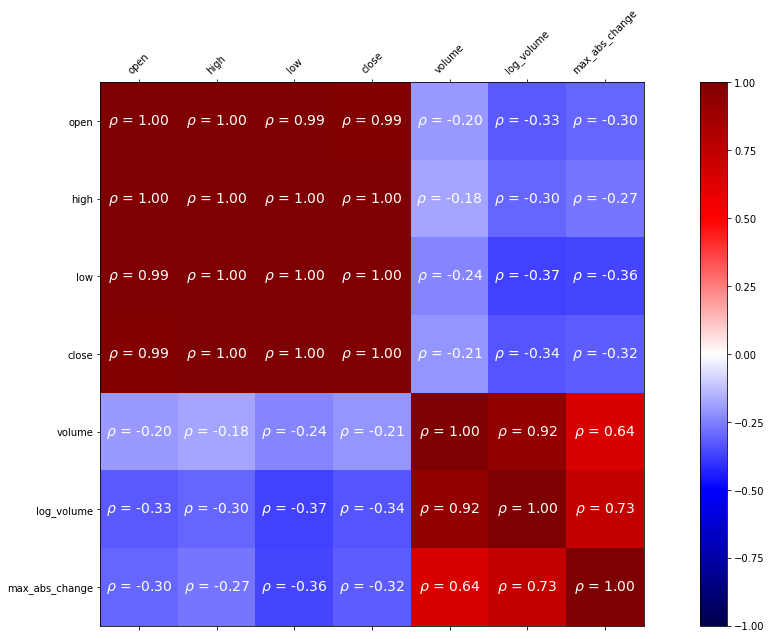

In [40]:
# definimos la figura
fig, ax = plt.subplots(figsize=(20,10))

# creamos el mapa de calor
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1,1)
fig.colorbar(im)

# construimos el todo
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# incluimos los valores de los coeficientes de correlación
for (i,j), coef in np.ndenumerate(fb_corr):
  ax.text(
      i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
  )

In [41]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64